# How-to: work with geometry objects

The QEC Framework has some primitive geometric classes used to store geometric structures. At present these structures only consist of vertices, edges, wireframes, faces and shells. 

- A `Vertex` is a point in space
- An `Edge` is a list of `Vertex`s (so hyperedges are allowed and so are self loops).
- A `Wireframe` is a list of `Edge`s
- A `Face` is a list of `Wireframe`s
- A `Shell` is a list of `Faces`

Vertices may have qubits associated with them. Currently this is not possible with edges etc. but this will be added in the future. An operator (Pauli operator) is associated with the `Face` and a set of Pauli operators is assocoiated with a `Shell`.

The geometry system currently being used is a intermediate step until a solid geometry C++ library is created and implemented. Thus the current geometry work is not necessarily fast or fully featured.


In [1]:
import numpy as np

from qiskit_qec.operators.pauli import Pauli

from qiskit_qec.geometry.model.qubit_count import QubitCount
from qiskit_qec.geometry.model.qubit_data import QubitData
from qiskit_qec.geometry.model.vertex import Vertex
from qiskit_qec.geometry.model.edge import Edge
from qiskit_qec.geometry.model.wireframe import WireFrame
from qiskit_qec.geometry.model.face import Face
from qiskit_qec.geometry.model.shell import Shell


# Create a square faces that represent an XXXX operator and a ZZZZ operator that
# share a common edge.

X_OPERATOR = Pauli("X")
Z_OPERATOR = Pauli("Z")
Y_OPERATOR = Pauli("Y")

qubit_count = QubitCount()
qubit_data = QubitData()

v1 = Vertex(np.array([0, 1]))
qubit_data.qubit[v1.id] = qubit_count.new_qubit()
qubit_count.increment_qubit(qubit_data.qubit[v1.id])
qubit_data.operator[v1.id] = X_OPERATOR

v2 = Vertex(np.array([1, 0]))
qubit_data.qubit[v2.id] = qubit_count.new_qubit()
qubit_count.increment_qubit(qubit_data.qubit[v2.id])
qubit_data.operator[v2.id] = X_OPERATOR

v3 = Vertex(np.array([1, 1]))
qubit_data.qubit[v3.id] = qubit_count.new_qubit()
qubit_count.increment_qubit(qubit_data.qubit[v3.id])
qubit_data.operator[v3.id] = X_OPERATOR

v4 = Vertex(np.array([0, 0]))
qubit_data.qubit[v4.id] = qubit_count.new_qubit()
qubit_count.increment_qubit(qubit_data.qubit[v4.id])
qubit_data.operator[v4.id] = X_OPERATOR


e1 = Edge([v4, v2])
e2 = Edge([v2, v3])
e3 = Edge([v3, v1])
e4 = Edge([v1, v4])

wf1 = WireFrame([e1, e2, e3, e4])
f1 = Face([wf1])

v5 = Vertex(np.array([1, 0]))
qubit_data.qubit[v5.id] = qubit_data.qubit[v1.id]
qubit_count.increment_qubit(qubit_data.qubit[v1.id])
qubit_data.operator[v5.id] = Z_OPERATOR

v6 = Vertex(np.array([1, 1]))
qubit_data.qubit[v6.id] = qubit_data.qubit[v3.id]
qubit_count.increment_qubit(qubit_data.qubit[v3.id])
qubit_data.operator[v6.id] = Z_OPERATOR

v7 = Vertex(np.array([2, 0]))
qubit_data.qubit[v7.id] = qubit_count.new_qubit()
qubit_count.increment_qubit(qubit_data.qubit[v7.id])
qubit_data.operator[v7.id] = Z_OPERATOR

v8 = Vertex(np.array([2, 1]))
qubit_data.qubit[v8.id] = qubit_count.new_qubit()
qubit_count.increment_qubit(qubit_data.qubit[v8.id])
qubit_data.operator[v8.id] = Z_OPERATOR


e5 = Edge([v5, v6])
e6 = Edge([v6, v8])
e7 = Edge([v8, v7])
e8 = Edge([v7, v5])

wf2 = WireFrame([e5, e5, e6, e7])
f2 = Face([wf2])

s = Shell([f1, f2])

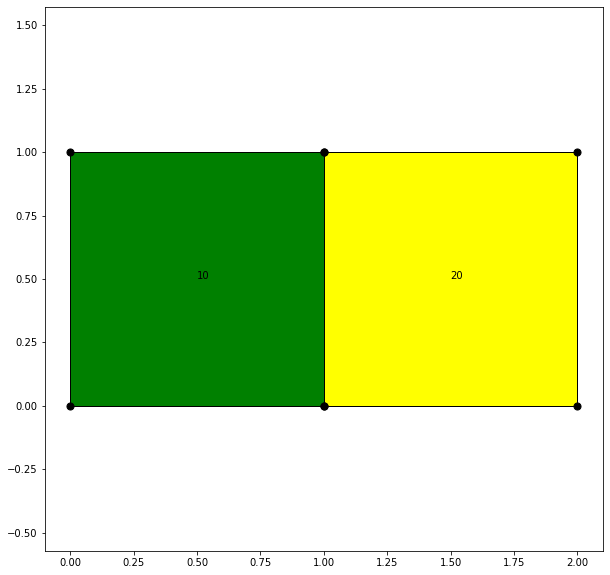

In [14]:
# Draw the shell
s.draw(qubit_data=qubit_data, xcolor='green', zcolor='yellow', show_face_ids=True)